In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from chart import show, show_collection
import numpy as np

# Avaliação teórico-prática 1 (ATP1)

*Para questões discursivas, você pode escrever em formato Markdown/LaTeX ou, preferencialmente, incluir uma fotografia da solução do exercício.*

___
**1.** **(1 pontos)** Qual é o conceito fundamental por trás da filtragem espacial no processamento de imagens e como isso se relaciona com o processo de realçar ou suprimir características específicas em uma imagem? Forneça um exemplo de uma aplicação onde a filtragem espacial é comumente utilizada.
___

[*Resposta aqui*]

...

___
**2.** **(2 pontos)** Considere um sinal unidimensional $x[n]$ representando uma sequência de valores:

$x[n] = [1, 2, 3, 2, 1, 0, -1, -2, -1, 0, 1, 2, 3]$

Agora, você deseja aplicar um kernel de passa-alta de 3 elementos $h[k]$ para realçar características de alta frequência no sinal $x[n]$. O kernel é definido como:

$h[k] = [-1, 2, -1]$

Qual seria o resultado da convolução e da correlação após a aplicação do kernel? O que isso revelaria sobre as características do sinal original?
___

[*Resposta aqui*]

...

___
**3.** **(2 pontos)** O Unsharp Masking é uma técnica de realce de imagem amplamente utilizada no processamento de imagens. Considere $\bar{f}(x,y)$ uma versão borrada da imagem original $f(x,y)$. A imagem resultante $g(x,y)$ é obtida pela fórmula:

$$g(x,y) = f(x,y) + k \cdot g_{\text{mask}}(x,y),$$

onde $g_{\text{mask}}(x,y) = f(x,y) - \bar{f}(x,y)$ e $k$ é um fator de ponderação que controla a intensidade do realce.

Qual é o papel da imagem "máscara" $g_{\text{mask}}(x,y)$ no Unsharp Masking? Como o fator de ponderação $k$ afeta o resultado do realce? Dê um exemplo de aplicação prática em que o Unsharp Masking pode ser útil.
___

[*Resposta aqui*]

...

___
**4.** **(5 pontos)** Neste exercício, você deve implementar a função `def unsharp_masking(image, f_lowpass, k)` que aplica a operação de Unsharp Masking sobre uma image de entrada.

___

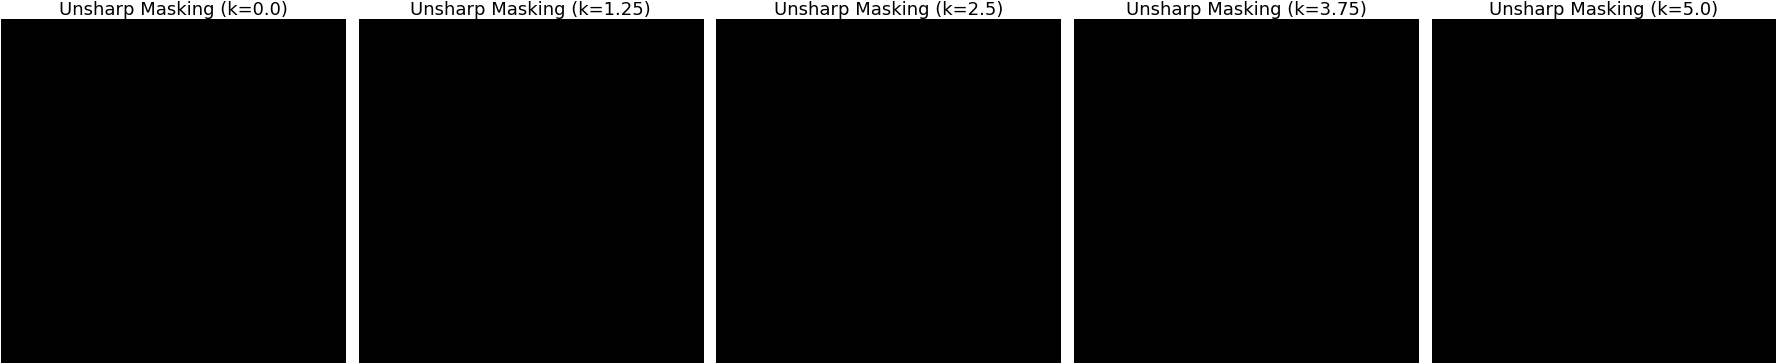

In [7]:
from skimage.filters import gaussian
from skimage import data
from chart import plot_histogram

def unsharp_masking(image, f_lowpass, k=1):
    # Create an empty image for the enhanced result
    enhanced_image = np.zeros(image.shape)

    ########################################################
    # YOUR CODE HERE.                                      #
    # IMPORTANT: Do Not Modify Above or Below This Section #
    ########################################################

    return enhanced_image

# Load an example image (e.g., the moon image from skimage)
image = data.moon()

# Define a low-pass filter function using Gaussian smoothing
f_lowpass = lambda image: gaussian(image, sigma=1.0, preserve_range=True)

# Apply unsharp masking for different values of k
enhanced_images = []
ks = np.linspace(0, 5, 5)
for k in ks:
    enhanced_image = unsharp_masking(image, f_lowpass, k=k)
    enhanced_images.append(enhanced_image)

# Titles for the enhanced images
titles = [f"Unsharp Masking (k={k})" for k in ks]

# Display the collection of enhanced images using show_collection
show_collection(enhanced_images, titles=titles, scale=0.07, fontsize=13, cmap="gray")


___
**5.** **(5 pontos)** A especificação de histograma é um processo de ajuste de um histograma de imagem para que ele corresponda a um histograma de referência desejado. Resumidamente, o processo envolve os seguintes passos:

1) Através na normalização de histograma, calcule $s_k = T(r_k)$. Arredonde valores de $s_k$ para o intervalo (inteiro) $[0, L - 1]$
2) Compute valores de $G(z_q)$ para $q = 0, 1, \ldots, L - 1$. Arredonde valores de $G$ para o intervalo (inteiro) $[0, L - 1]$ e armazene-os numa lookup table (Tabela $G$).
3) Para todos os valores possíveis de $s_k, k = 0, 1, \ldots, L - 1$, encontre na Tabela $G$ o $z_q$ tal que valor de $G(z_q)$ é mais próximo de $s_k$. Em caso de múltiplos valores, escolher o menor. Armazenar esse mapeamento $s_k \mapsto z_q$ (Tabela $SZ$).
4) Mapear os pixels da imagem equalizada obtida no passo 1 utilizando a Tabela $SZ$.

<img src="../images/hist-matching.png" alt="Image" width="700">

O resultado é uma imagem que possui um histograma ajustado para corresponder ao histograma de referência desejado, o que pode melhorar o contraste, realçar características específicas ou transformar a imagem de acordo com um critério pré-definido.

Neste exercício, você deve implementar a função `def histogram_matching(source_image, target_image)` que ajusta o histograma da imagem de origem (`source_image`) de modo a coincidir com a imagem alvo (`target_image`).


___

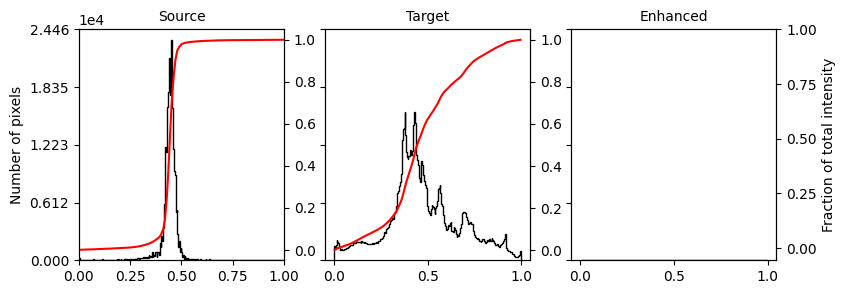

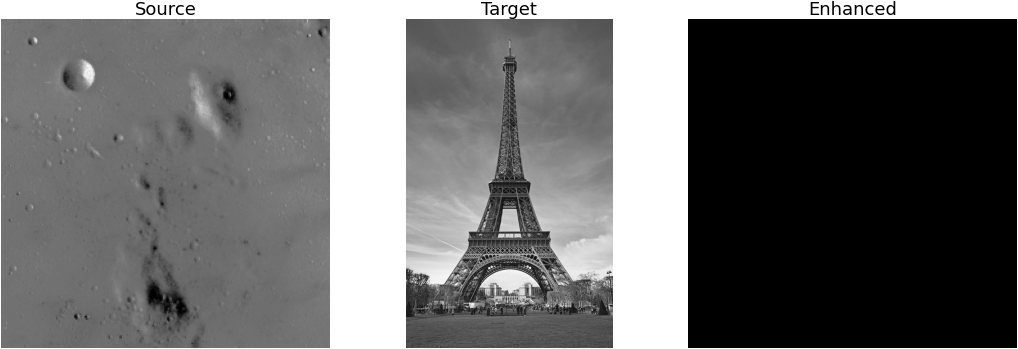

In [8]:
from skimage import io, color, data
from chart import plot_histogram

def histogram_matching(source_image, target_image, L=256):
    # Create an empty image for the enhanced result
    enhanced_image = np.zeros_like(source_image)

    ########################################################
    # YOUR CODE HERE.                                      #
    # IMPORTANT: Do Not Modify Above or Below This Section #
    ########################################################

    return enhanced_image

# Load the source image to be processed (e.g., the moon image from skimage)
source_image = data.moon()

# Load the target image (from which the target histogram will be extracted)
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/Eiffel_Tower_Marsfeld_Paris.jpg/800px-Eiffel_Tower_Marsfeld_Paris.jpg"
target_image = io.imread(image_url)
target_image = color.rgb2gray(target_image)

# Perform histogram matching
enhanced_image = histogram_matching(source_image, target_image)

# Plot histograms
histograms = plot_histogram([source_image, target_image, enhanced_image], titles=["Source", "Target", "Enhanced"], return_as_image=False)

# Display the source, target, and enhanced images
show_collection([source_image, target_image, enhanced_image], titles=["Source", "Target", "Enhanced"], scale=0.07, fontsize=13, cmap="gray")